In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sts
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
import scipy.optimize as opt

In [255]:
"""Reading manipulating file with country name
and returning a dataframe and transpose of the dataframe as return"""
def dataFrame(file_name, col, value1,countries):
    # Reading Data for dataframe
    df = pd.read_csv(file_name, skiprows = 4)
    # Grouping data with col value
    df1 = df.groupby(col, group_keys = True)
    #retriving the data with the all the group element
    df1 = df1.get_group(value1)
    #Reseting the index of the dataframe
    df1 = df1.reset_index()
    #Storing the column data in a variable
    a = df1['Country Name']
    # cropping the data from dataframe
    df1 = df1.iloc[countries,3:]
    df1 = df1.drop(columns=['Indicator Name', 'Indicator Code']) 
    df1.insert(loc=0, column='Country Name', value=a)
    #Dropping the NAN values from dataframe Column wise
    df1= df1.dropna(axis = 1)
    #transposing the index of the dataframe
    df2 = df1.set_index('Country Name').T
    #returning the normal dataframe and transposed dataframe
    return df1, df2

In [256]:
# years using for the data analysis
#years = 35
# countries which are using for data analysis
countries = [35, 55, 81, 109]
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
ele_con_c, ele_con_y = dataFrame("API_19_DS2_en_csv_v2_4700503.csv",
                                       "Indicator Name", "Electric power consumption (kWh per capita)",countries)

ele_con_c

,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
35,Canada,9166.683666,9803.558419,10241.920858,10804.600795,10466.582625,11075.954225,11797.262588,12269.019296,12422.761126,...,16948.275221,16508.339552,16683.133659,16377.479696,15450.730689,15269.745477,15644.540278,15336.624857,15750.811633,15588.487146
55,Germany,4064.454716,4335.769625,4654.985048,4803.423204,4743.944833,5146.932578,5285.260786,5574.745217,5786.127216,...,7138.221485,7212.437448,7229.089913,7187.764009,6817.158398,7264.322591,7281.272174,7270.152523,7217.529089,7035.482975
81,United Kingdom,4254.652412,4372.636946,4671.718297,4534.254275,4492.421629,4587.688515,4668.423169,4729.849387,4922.915733,...,6270.984059,6200.554113,6102.396768,6015.726861,5643.128595,5700.855864,5471.933475,5449.259473,5409.626422,5130.390253
109,India,97.772718,100.305074,100.632154,103.992658,114.558928,124.123692,126.256734,135.917641,135.741774,...,468.025754,509.214055,541.738395,561.247581,598.498242,640.394607,696.842681,723.236917,764.201134,804.516349


In [257]:

ele_con_y

Country Name,Canada,Germany,United Kingdom,India
1971,9166.683666,4064.454716,4254.652412,97.772718
1972,9803.558419,4335.769625,4372.636946,100.305074
1973,10241.920858,4654.985048,4671.718297,100.632154
1974,10804.600795,4803.423204,4534.254275,103.992658
1975,10466.582625,4743.944833,4492.421629,114.558928
1976,11075.954225,5146.932578,4587.688515,124.123692
1977,11797.262588,5285.260786,4668.423169,126.256734
1978,12269.019296,5574.745217,4729.849387,135.917641
1979,12422.761126,5786.127216,4922.915733,135.741774
1980,12803.975515,5797.499753,4683.932739,141.707702


In [258]:
x = ele_con_y.values #returns a numpy array
x

array([[ 9166.6836657 ,  4064.45471612,  4254.65241185,    97.77271821],
       [ 9803.55841896,  4335.76962475,  4372.63694645,   100.30507381],
       [10241.92085845,  4654.98504839,  4671.71829741,   100.63215413],
       [10804.60079545,  4803.42320359,  4534.25427513,   103.99265792],
       [10466.58262497,  4743.9448331 ,  4492.42162851,   114.55892759],
       [11075.9542253 ,  5146.93257779,  4587.68851502,   124.12369156],
       [11797.26258831,  5285.26078632,  4668.423169  ,   126.25673396],
       [12269.01929596,  5574.74521659,  4729.84938707,   135.91764067],
       [12422.76112631,  5786.12721572,  4922.9157328 ,   135.74177375],
       [12803.97551492,  5797.49975271,  4683.93273912,   141.70770152],
       [13239.40875704,  5832.0648707 ,  4572.95384626,   151.87905877],
       [12981.07866794,  5822.02735932,  4480.33541287,   158.09991173],
       [13457.06579135,  5965.45819349,  4549.17528757,   165.68748602],
       [14343.39203344,  6239.9718156 ,  4597.73969

In [259]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)


In [260]:
normalized_df

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.078645,0.084343,0.058514,0.003583
2,0.132777,0.183576,0.206844,0.004046
3,0.202261,0.229720,0.138669,0.008801
4,0.160520,0.211231,0.117922,0.023751
5,0.235769,0.336506,0.165169,0.037285
6,0.324841,0.379507,0.205210,0.040303
7,0.383096,0.469498,0.235674,0.053973
8,0.402082,0.535210,0.331425,0.053724
9,0.449156,0.538745,0.212902,0.062165


In [261]:
wcss = []
y=normalized_df.values

y

array([[0.        , 0.        , 0.        , 0.        ],
       [0.07864542, 0.08434265, 0.05851445, 0.00358313],
       [0.13277725, 0.18357595, 0.20684389, 0.00404593],
       [0.20226061, 0.22972037, 0.13866859, 0.00880084],
       [0.16051994, 0.21123055, 0.11792168, 0.02375148],
       [0.23576908, 0.33650584, 0.16516931, 0.03728505],
       [0.32484091, 0.37950741, 0.20520967, 0.04030318],
       [0.38309648, 0.46949835, 0.23567402, 0.05397279],
       [0.40208152, 0.53520988, 0.3314253 , 0.05372394],
       [0.44915634, 0.53874522, 0.21290165, 0.06216538],
       [0.50292645, 0.54949035, 0.15786165, 0.07655724],
       [0.47102618, 0.54637003, 0.11192752, 0.08535937],
       [0.52980415, 0.59095783, 0.14606867, 0.09609534],
       [0.63925345, 0.67629486, 0.17015419, 0.12101864],
       [0.70270902, 0.74113162, 0.2837143 , 0.1354977 ],
       [0.76521058, 0.76652904, 0.34666974, 0.15593176],
       [0.81891333, 0.80880091, 0.41054129, 0.17325664],
       [0.89190011, 0.84302365,

In [262]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)
    
wcss


C:\Users\Puneet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[13.972567852564397,
 4.472472453078767,
 2.8979405193281615,
 1.806073127009156,
 0.9934631322386311,
 0.7766814646068952,
 0.6062708024047578,
 0.5038449925551632,
 0.42329959847933674]

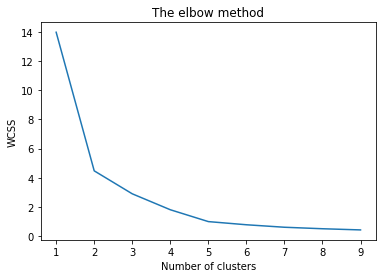

In [263]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [264]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(normalized_df)

In [265]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4])

In [266]:
lables = kmeans.fit_predict(normalized_df)
centroids= kmeans.cluster_centers_

In [267]:
centroids

array([[0.94074948, 0.86475583, 0.89865745, 0.47918381],
       [0.46277318, 0.53575924, 0.19640283, 0.07364948],
       [0.13499538, 0.17422923, 0.11451965, 0.01291107],
       [0.85085518, 0.76470613, 0.50939948, 0.24841678],
       [0.78292148, 0.95846229, 0.601528  , 0.85864554]])

In [268]:
'''normalized_df['lables']=lables
normalized_df
'''

"normalized_df['lables']=lables\nnormalized_df\n"

In [269]:
normalized_df.values[y_kmeans == 0, 1]

array([0.72707856, 0.73468392, 0.75075305, 0.75872452, 0.79922679,
       0.83877892, 0.88171799, 0.91558561, 0.94643474, 0.95553037,
       0.97860161, 0.9837783 , 0.97093147])

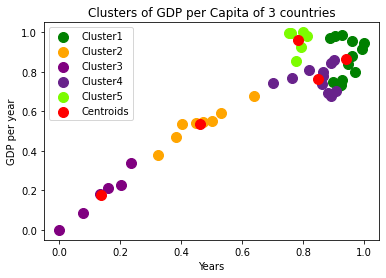

In [270]:
plt.figure()
plt.scatter(normalized_df.values[y_kmeans == 0, 0], normalized_df.values[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster1')
plt.scatter(normalized_df.values[lables == 1, 0], normalized_df.values[lables == 1, 1], s = 100, c = 'orange', label = 'Cluster2')
plt.scatter(normalized_df.values[lables == 2, 0], normalized_df.values[lables == 2, 1], s = 100, c = 'purple', label = 'Cluster3')
plt.scatter(normalized_df.values[lables == 3, 0], normalized_df.values[lables == 3, 1], s = 100, c = '#68228B', label = 'Cluster4')
plt.scatter(normalized_df.values[lables == 4, 0], normalized_df.values[lables == 4, 1], s = 100, c = '#7CFC00', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.legend()
plt.title('Clusters of GDP per Capita of 3 countries')
plt.xlabel('Years')
plt.ylabel('GDP per year')
plt.show()


In [271]:
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
school_c, school_y = dataFrame("API_19_DS2_en_csv_v2_4700503.csv",
                                       "Indicator Name", "School enrollment, primary and secondary (gross), gender parity index (GPI)",countries)
school_y['years'] = school_y.index

<AxesSubplot:>

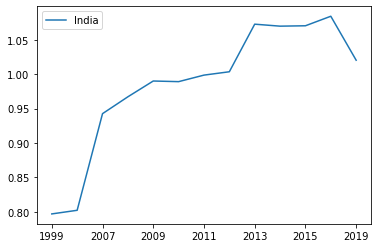

In [272]:
school_y.plot(y='India',use_index=True)

In [273]:
def exponential(t, n0, g):
    """Calculates exponential function with scale factor n0 and growth rate g."""
    t = t - 1960.0
    f = n0 * np.exp(g*t)
    return f

In [274]:
print(type(school_y["years"].iloc[1]))
school_y["years"] = pd.to_numeric(school_y["years"])
print(type(school_y["years"].iloc[1]))
param, covar = opt.curve_fit(exponential, school_y["years"], school_y["India"],
p0=(73233967692.102798, 0.03))

<class 'str'>
<class 'numpy.int64'>


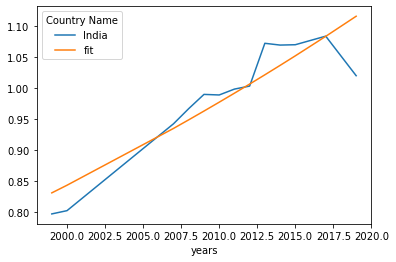

In [275]:
school_y["fit"] = exponential(school_y["years"], *param)
school_y.plot("years", ["India", "fit"])
plt.show()

In [253]:
import errors as err

low, up = err.err_ranges(year, logistic, param, sigma)

ModuleNotFoundError: No module named 'errors'